In [64]:
# dependencies
import gc
import sys
import torch
from tensorboardX import SummaryWriter

In [65]:
# modules used for testing and viewing
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

In [66]:
# user defined modules
from HyperParameters import OPTIONS
from ImageLoader import VAL_DATASET as dataloader
from ImageLoader import IDX2WORD

In [67]:
# set up a method for drawing the images
TO_IMG = ToPILImage()

In [68]:
# create a data plot
def plot(pics, alps, caption, caps, fig_num):
    '''A method for plotting the image locations attended to by the model and the corresponding
    captions.'''
    alps = alps.squeeze(0)
    width = alps.size(0)
    fig = plt.figure(fig_num, figsize=(10, width))
    fig.add_subplot(2, 1, 1)
    pics = TO_IMG(pics.squeeze(0))
    plt.title('Accepted caption at epoch {}:\n {}'.format(120, " ".join(caps)))
    plt.imshow(pics)
    for k in range(width):
        fig.add_subplot(2, width, k + width + 1)
        plt.title(caption[k])
        plt.imshow(pics)
        alpha = TO_IMG(alps[k].unsqueeze(0))
        plt.imshow(alpha, cmap='gray', alpha=.7)
    plt.show()
    plt.close()

In [69]:
# number of results to display
num_results = OPTIONS['num_results']

In [70]:
# initialize model and loss function
CHECKPOINT = torch.load('../../ImageModels/img_embedding_model_119.pth', map_location='cpu')
MODEL = CHECKPOINT['model']
INFERENCE = MODEL.infer_beam_search

In [71]:
# set the mode to train and show the model details
MODEL.eval()

Image2Caption(
  (image_encoder): ImageEncoder(
    (pretrained_net): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): MaxPoo

In [72]:
# collect data for the first image using the annotations, caption labels, and image location
image, img, labels, _ = dataloader[0]
image = image.unsqueeze(0)
img = img.unsqueeze(0)
labels = labels[1:-1]

In [73]:
# retrieve the predicted captions, encoded features, and attention weights of the given image
all_words, all_summaries, all_alphas = INFERENCE(img)

In [74]:
# parse through the output indices and convert them to words using the IDX2WORD dictionary
for j, _ in enumerate(all_words):
    words = all_words[j]
    summaries = all_summaries[j].unsqueeze(0)
    alphas = all_alphas[j]
    sentence = [IDX2WORD[str(word.item())].value.decode("utf-8") for word in words]
    phrase = [IDX2WORD[str(word.item())].value.decode("utf-8") for word in labels]

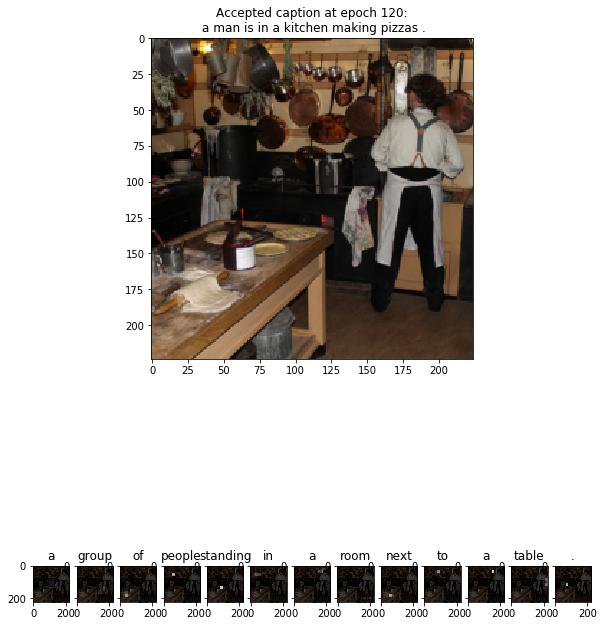

In [77]:
# plot the output to see the predicted result from the model:
plot(img, alphas, sentence, phrase, 1)
